# Decision Trees using sklearn on IRIS and MNIST DATASET

For all the three different criteria : criterion are “gini”, “entropy”, and “log_loss”.

# Decision Trees using sklearn on IRIS DATASET

In [3]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
# importing dataset
from sklearn.datasets import load_iris

In [5]:
#fetching dataset
iris = load_iris()

In [6]:
# separating features and targets 
x_iris, y_iris = iris.data, iris.target

In [7]:
#spliting test and train datasets
x_train,x_test,y_train,y_test=train_test_split(x_iris,y_iris,test_size=0.2)

# GINI CRITERIA

In [8]:
#choosing right algo using gini criteria
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,random_state = 1)
clf= clf.fit(x_train,y_train)

In [9]:
#predicting
y_pred= clf.predict(x_test)

In [10]:
len(y_pred)

30

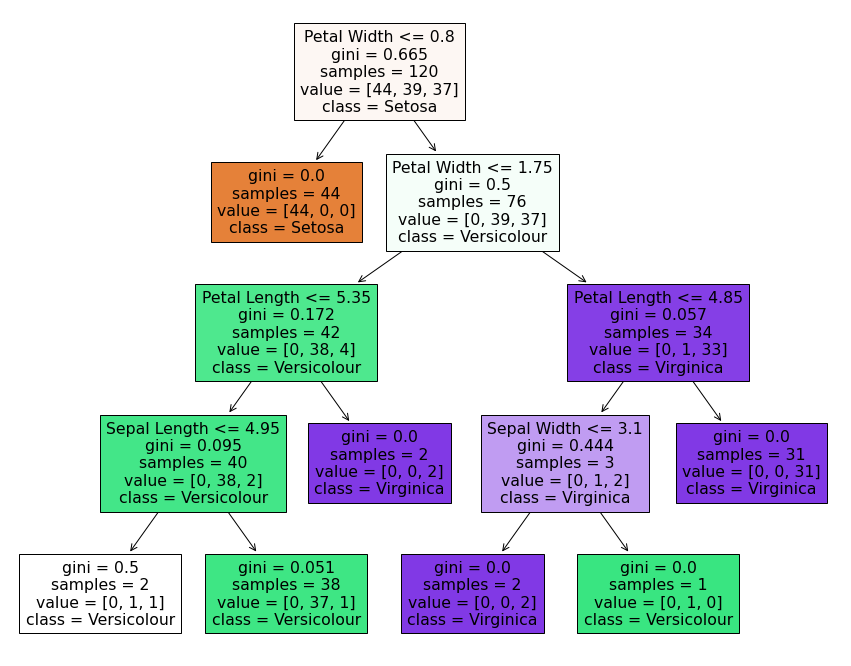

In [11]:
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
plt.show()

In [12]:
#finding accuracy from scratch for gini
correct = 0
incorrect = 0
for i in range(30):
    if y_pred[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  29 : incorrect =  1
Accuracy =  96.66666666666667


In [13]:
#Now we have our actual and predicted values of y
both=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
#both

In [14]:
#creating confusion matrix
confusion_matrix = pd.crosstab(both['y_test'], both['y_pred'])
print (confusion_matrix)

y_pred  0   1   2
y_test           
0       6   0   0
1       0  11   0
2       0   1  12


[Text(0.5, 28.5, 'ACTUAL VALUES'),
 Text(28.5, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

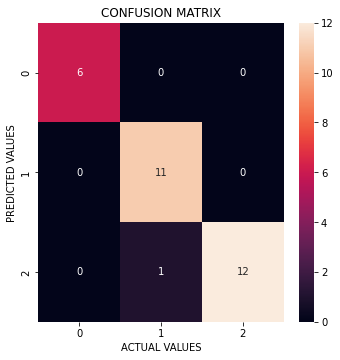

In [15]:
fig=plt.figure(figsize=(5.5,5.5))
a=sn.heatmap(confusion_matrix,annot=True)
a.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [16]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(confusion_matrix.shape[0]):
    tp=confusion_matrix.iloc[i,i]
    fp=confusion_matrix.iloc[i,:].sum()-tp
    fn=confusion_matrix.iloc[:,i].sum()-tp
    tn=confusion_matrix.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(confusion_matrix.index[i]),precision,recall,f1_score)

for class 0 is: 1.0 1.0 1.0
for class 1 is: 1.0 0.9166666666666666 0.9565217391304348
for class 2 is: 0.9230769230769231 1.0 0.9600000000000001


Text(0, 0.5, 'True positive rate')

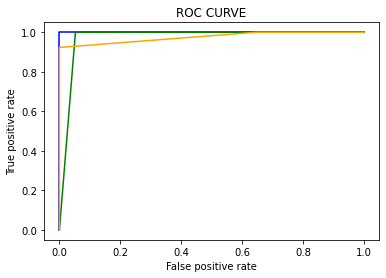

In [17]:
#plotting curve
from sklearn.metrics import roc_curve
p_prob= clf.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(y_test,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=3

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# ENTROPY CRITERIA

In [18]:
#using entropy criteria
clf_e = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,random_state = 1)
clf_e= clf_e.fit(x_train,y_train)

In [19]:
y_prede= clf_e.predict(x_test)

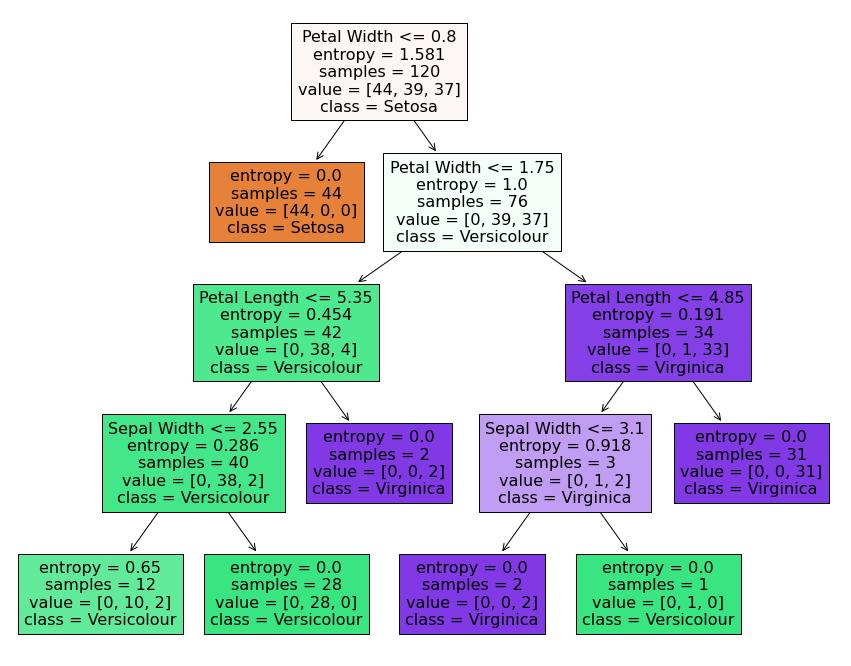

In [20]:
plt.figure(figsize=(15,12))
plot_tree(clf_e, filled=True,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
plt.show()

In [21]:
#finding accuracy from scratch for entropy
correct = 0
incorrect = 0
for i in range(30):
    if y_prede[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  29 : incorrect =  1
Accuracy =  96.66666666666667


In [22]:
#Now we have our actual and predicted values of y
both=pd.DataFrame({'y_test':y_test,'y_prede':y_prede})
#both

In [23]:
#creating confusion matrix
confusion_matrixe = pd.crosstab(both['y_test'], both['y_prede'])
print (confusion_matrixe)

y_prede  0   1   2
y_test            
0        6   0   0
1        0  11   0
2        0   1  12


[Text(0.5, 28.5, 'ACTUAL VALUES'),
 Text(28.5, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

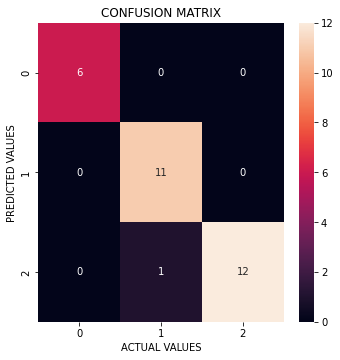

In [24]:
fig=plt.figure(figsize=(5.5,5.5))
a=sn.heatmap(confusion_matrixe,annot=True)
a.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [25]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(confusion_matrixe.shape[0]):
    tp=confusion_matrixe.iloc[i,i]
    fp=confusion_matrixe.iloc[i,:].sum()-tp
    fn=confusion_matrixe.iloc[:,i].sum()-tp
    tn=confusion_matrixe.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(confusion_matrixe.index[i]),precision,recall,f1_score)

for class 0 is: 1.0 1.0 1.0
for class 1 is: 1.0 0.9166666666666666 0.9565217391304348
for class 2 is: 0.9230769230769231 1.0 0.9600000000000001


Text(0, 0.5, 'True positive rate')

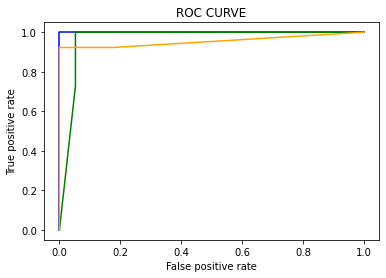

In [26]:
#plotting curve
from sklearn.metrics import roc_curve
p_prob= clf_e.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(y_test,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=3

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# LOG_LOSS CRITERIA

In [27]:
#using log_loss criteria
clf_l = DecisionTreeClassifier(criterion = 'log_loss',max_depth = 2,random_state = 1)
clf_l= clf_l.fit(x_train,y_train)

In [28]:
y_predl= clf_l.predict(x_test)

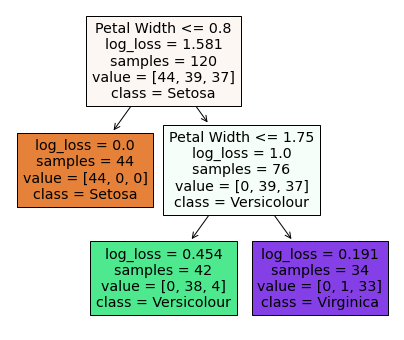

In [29]:
plt.figure(figsize=(7,6))
plot_tree(clf_l, filled=True,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
plt.show()

In [30]:
#Now we have our actual and predicted values of y
both=pd.DataFrame({'y_test':y_test,'y_predl':y_predl})
#both

In [31]:
#creating confusion matrix
confusion_matrixl = pd.crosstab(both['y_test'], both['y_predl'])
print (confusion_matrixl)

y_predl  0   1   2
y_test            
0        6   0   0
1        0  11   0
2        0   1  12


[Text(0.5, 28.5, 'ACTUAL VALUES'),
 Text(28.5, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

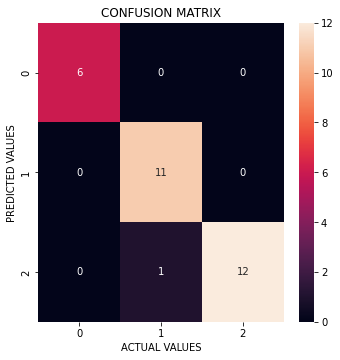

In [32]:
fig=plt.figure(figsize=(5.5,5.5))
a=sn.heatmap(confusion_matrixl,annot=True)
a.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [33]:
y_test=np.array(y_test)
y_predl=np.array(y_predl)
def metric(y_test,y_predl):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(y_test)):
        for j in range(3):
            if y_test[i]==j and y_predl[i]==j:
                tp+=1
            elif y_test[i]==j and y_predl[i]==j:
                tn+=1
            elif y_test[i]==j and y_predl[i]==j:
                fn+=1
            elif y_test[i]==j and y_predl[i]==j:
                fp+=1
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*precision*recall/(precision+recall)
    return precision,recall,f1_score
    precision,recall,f1_score= metric(y_test,y_predl)
print(precision,recall,f1_score)

0.9230769230769231 1.0 0.9600000000000001


In [34]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(confusion_matrixl.shape[0]):
    tp=confusion_matrixl.iloc[i,i]
    fp=confusion_matrixl.iloc[i,:].sum()-tp
    fn=confusion_matrixl.iloc[:,i].sum()-tp
    tn=confusion_matrixl.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(confusion_matrixl.index[i]),precision,recall,f1_score)

for class 0 is: 1.0 1.0 1.0
for class 1 is: 1.0 0.9166666666666666 0.9565217391304348
for class 2 is: 0.9230769230769231 1.0 0.9600000000000001


In [35]:
#finding accuracy from scratch
correct = 0
incorrect = 0
for i in range(30):
    if y_predl[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  29 : incorrect =  1
Accuracy =  96.66666666666667


Text(0, 0.5, 'True positive rate')

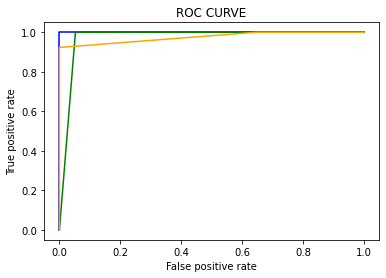

In [36]:
#plotting curve
from sklearn.metrics import roc_curve
p_prob= clf_l.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(y_test,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=3

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Decision Trees using sklearn on MNIST DATASET

In [35]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [36]:
x_1=mnist.data
y_1=mnist.target

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.2)

# GINI CRITERIA

In [38]:
#gini
reg= DecisionTreeClassifier(criterion = 'gini',max_depth = 12,random_state = 1)
reg= reg.fit(x_train,y_train)

In [39]:
yp=reg.predict(x_test)
yp

array(['7', '3', '4', ..., '0', '6', '1'], dtype=object)

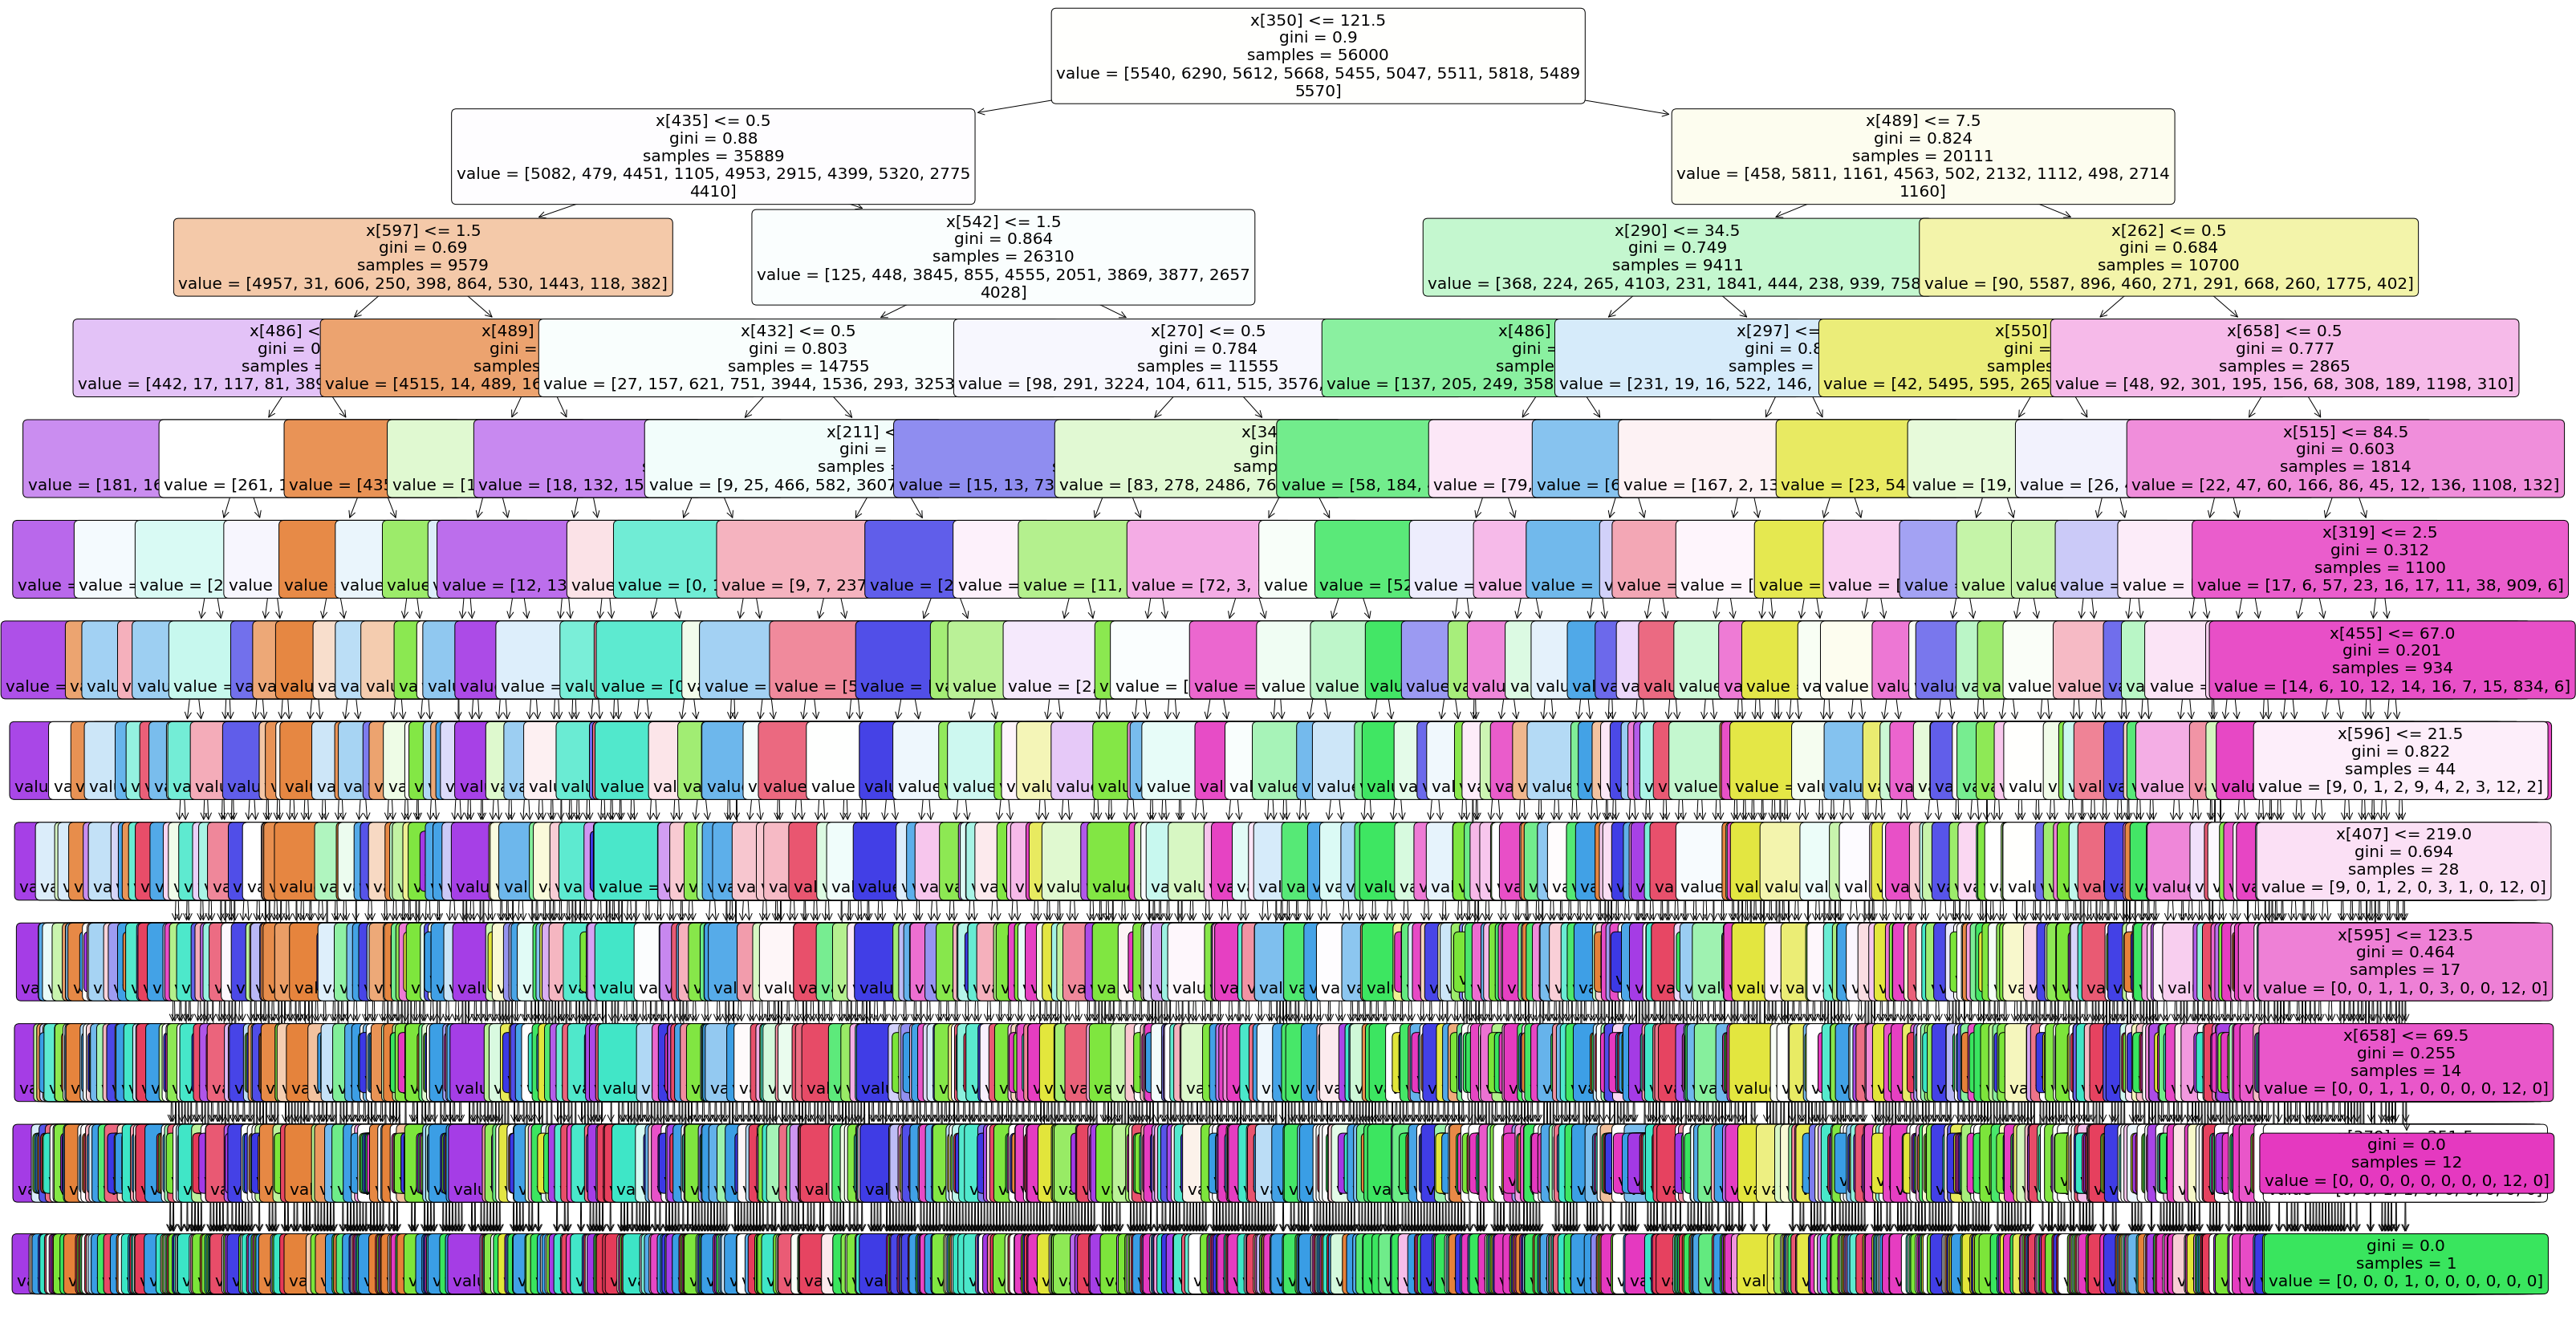

In [40]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(reg, rounded =True,filled= True, fontsize=20)
plt.show()

In [41]:
len(yp)

14000

In [42]:
#finding accuracy from scratch
correct = 0
incorrect = 0
for i in range(14000):
    if yp[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/14000) * 100
incorrect = 14000 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  12145 : incorrect =  1855
Accuracy =  86.75


In [43]:
val=pd.DataFrame({'y_test':y_test,'yp':yp})
#val

In [44]:
#plotting confusion matrix
c = pd.crosstab(val['y_test'], val['yp'])
print (c)

yp         0     1     2     3     4     5     6     7     8     9
y_test                                                            
0       1270     1    15    13     4    16    16     4    17     7
1          0  1513    14     9    10    15     5     3    14     4
2         25    14  1179    31    13    16    31    22    31    16
3         20    14    50  1203    17    64     7    21    43    34
4          6     8    20     5  1182    14     9    15    35    75
5         28    20    19    41    18  1044    31     7    40    18
6         21    11    25    14    19    34  1207     3    28     3
7          8    13    33    25    20     8     2  1312    11    43
8         13    39    34    47    29    35    26    17  1036    60
9         11     4    21    25    39    32     1    25    31  1199


[Text(0.5, 33.0, 'ACTUAL VALUES'),
 Text(33.0, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

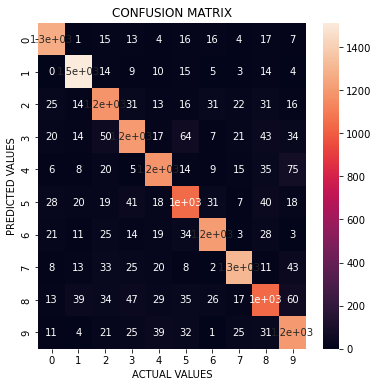

In [45]:
fig=plt.figure(figsize=(6,6))
b=sn.heatmap(c,annot=True)
b.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [46]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(c.shape[0]):
    tp=c.iloc[i,i]
    fp=c.iloc[i,:].sum()-tp
    fn=c.iloc[:,i].sum()-tp
    tn=c.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(c.index[i]),precision ,recall, f1_score)

for class 0 is: 0.9317681584739546 0.905848787446505 0.918625678119349
for class 1 is: 0.9533711405166981 0.9242516799022602 0.9385856079404468
for class 2 is: 0.8555878084179971 0.8361702127659575 0.845767575322812
for class 3 is: 0.8167006109979633 0.851380042462845 0.8336798336798337
for class 4 is: 0.8634039444850256 0.8749074759437454 0.8691176470588236
for class 5 is: 0.8246445497630331 0.8169014084507042 0.820754716981132
for class 6 is: 0.8842490842490842 0.9041198501872659 0.894074074074074
for class 7 is: 0.8894915254237288 0.9181245626312107 0.9035812672176308
for class 8 is: 0.7754491017964071 0.8055987558320373 0.7902364607170098
for class 9 is: 0.8638328530259366 0.8217957505140507 0.8422901299613629


Text(0, 0.5, 'True positive rate')

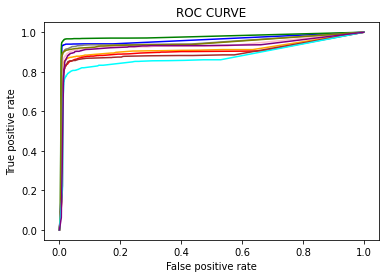

In [47]:
#plotting curve
from sklearn.metrics import roc_curve
yg=np.array(y_test,dtype='int')
p_prob= reg.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(yg,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=10

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(yg,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.plot(fpr[3],tpr[3],color='red')
plt.plot(fpr[4],tpr[4],color='pink')
plt.plot(fpr[5],tpr[5],color='brown')
plt.plot(fpr[6],tpr[6],color='gray')
plt.plot(fpr[7],tpr[7],color='olive')
plt.plot(fpr[8],tpr[8],color='cyan')
plt.plot(fpr[9],tpr[9],color='purple')

plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# ENTROPY CRITERIA

In [48]:
#entropy
reg_e= DecisionTreeClassifier(criterion = 'entropy')
reg_e= reg_e.fit(x_train,y_train)

In [49]:
ype=reg_e.predict(x_test)
ype

array(['7', '3', '4', ..., '5', '6', '1'], dtype=object)

In [50]:
correct = 0
incorrect = 0
for i in range(14000):
    if ype[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/14000) * 100
incorrect = 14000 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  12280 : incorrect =  1720
Accuracy =  87.71428571428571


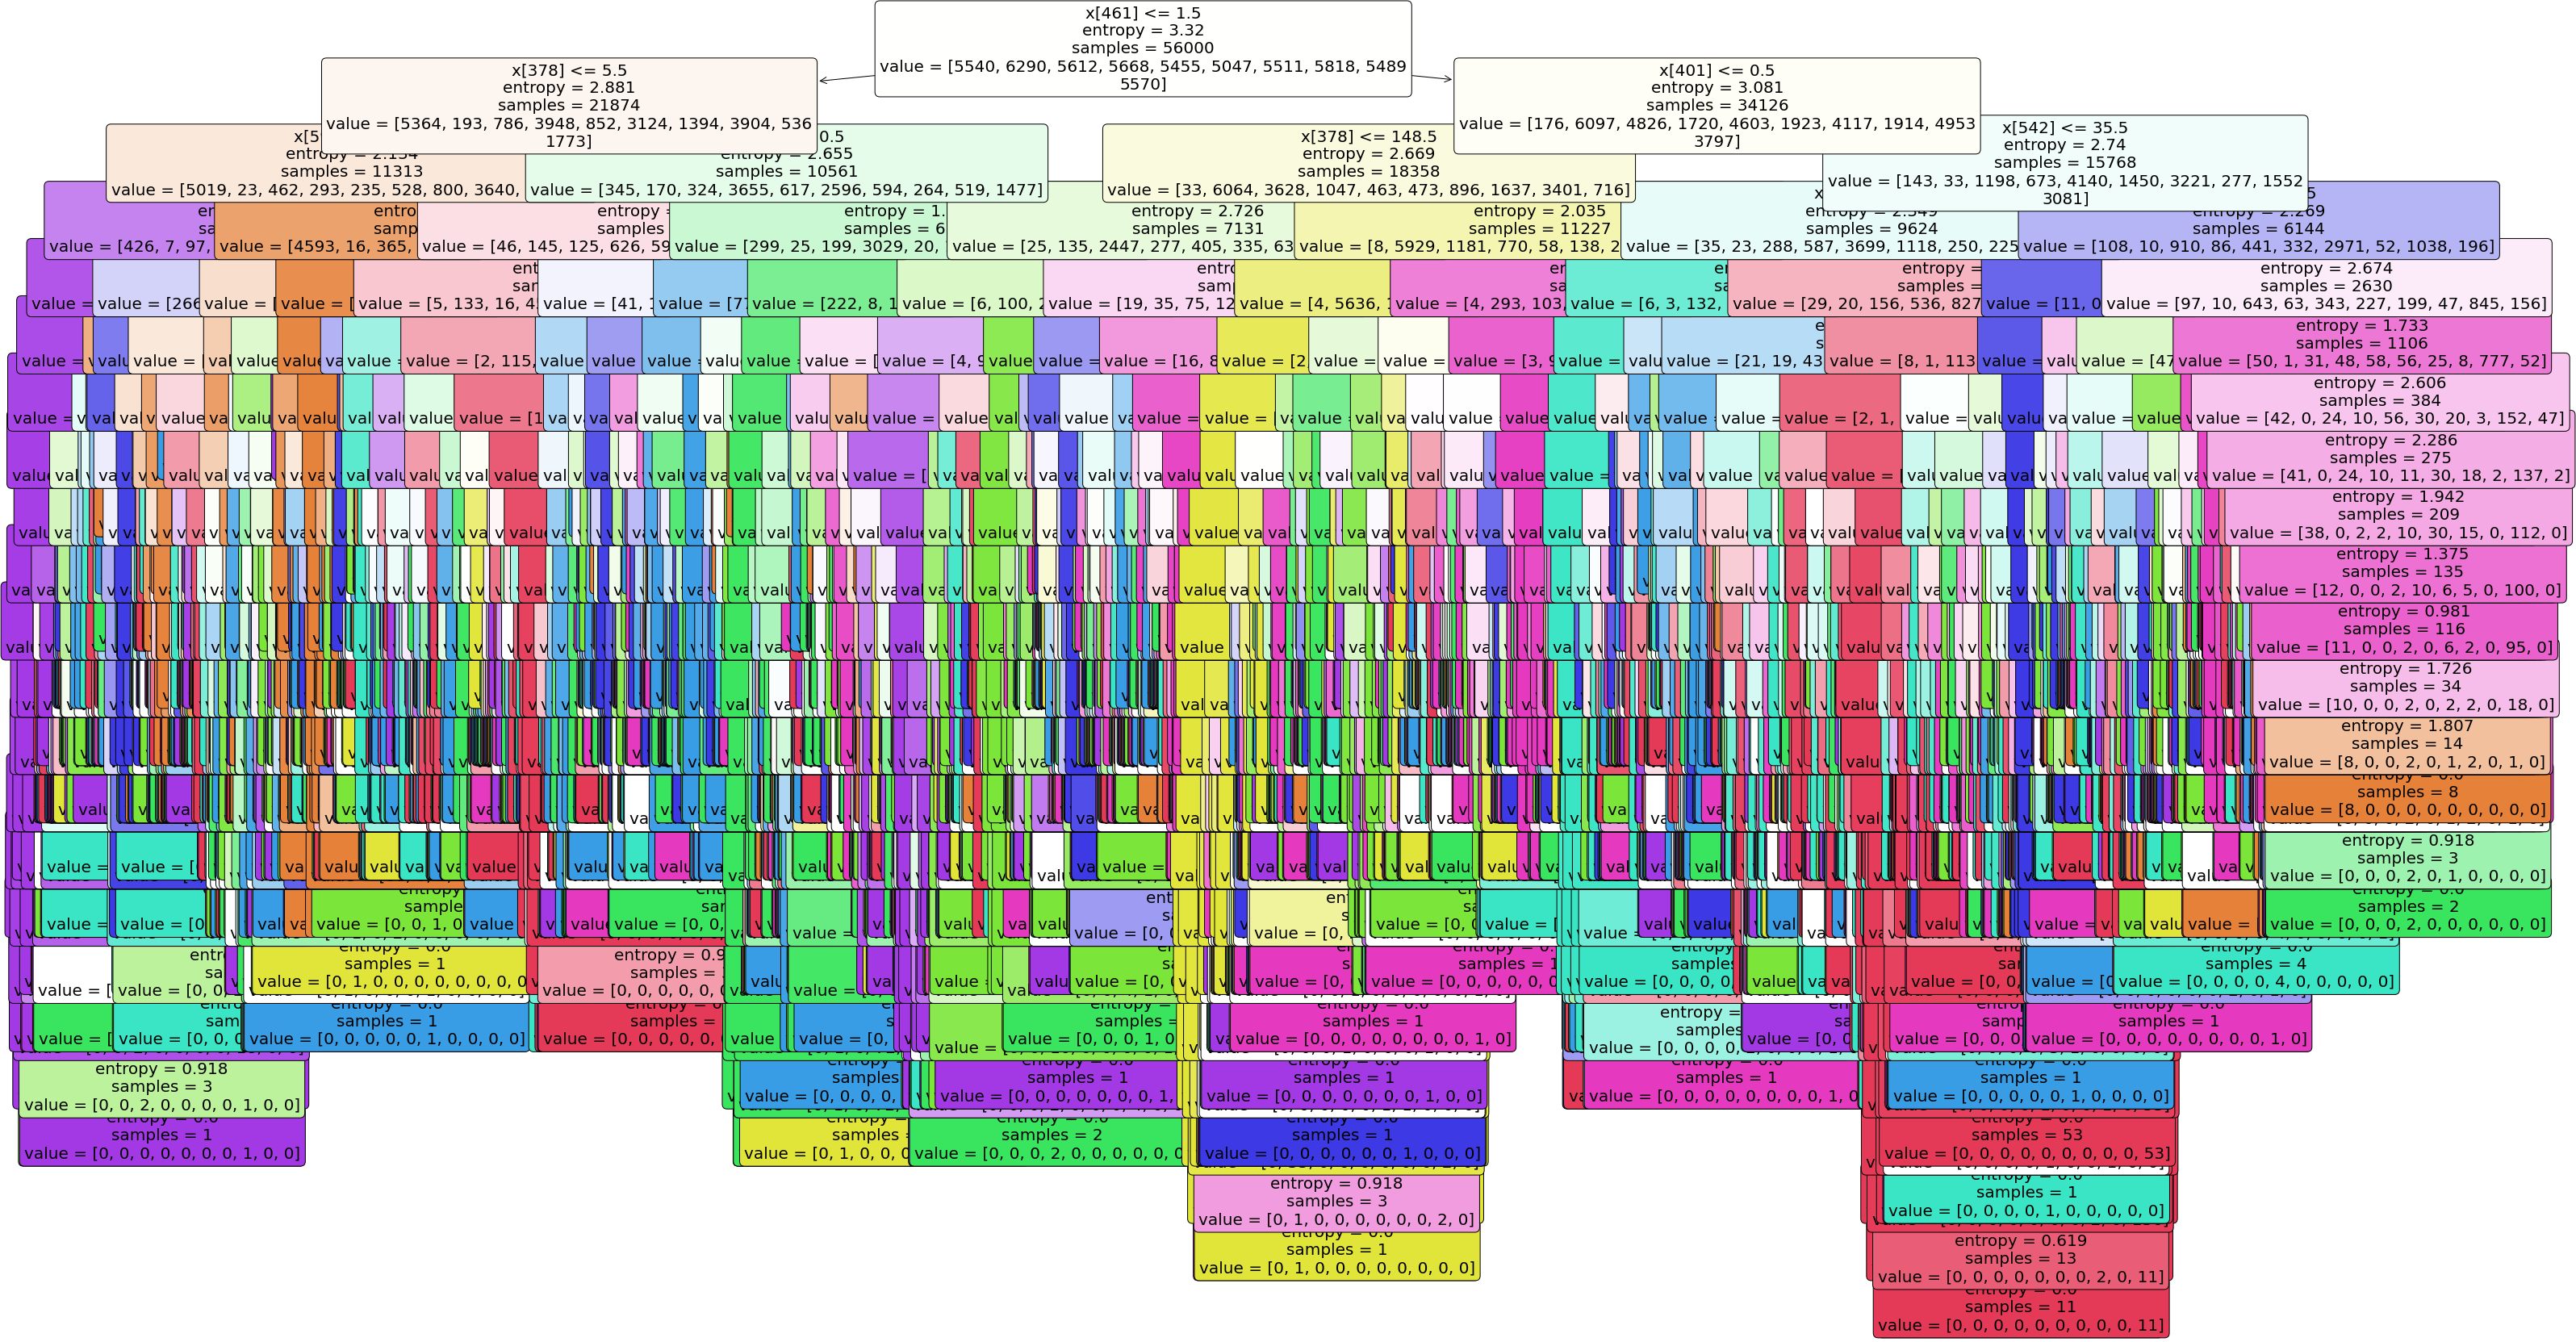

In [51]:
plt.figure(figsize=(50,30))
tree.plot_tree(reg_e, rounded =True,filled= True, fontsize=20)
plt.show()

In [52]:
val=pd.DataFrame({'y_test':y_test,'ype':ype})
#val

In [53]:
#plotting confusion matrix
ce = pd.crosstab(val['y_test'], val['ype'])
print (ce)

ype        0     1     2     3     4     5     6     7     8     9
y_test                                                            
0       1265     0    12    17     8    19    10     6    15    11
1          0  1519    10    11     5    14     4    12    10     2
2         18    12  1179    29    15    17    16    48    30    14
3          6    13    44  1233     5    71    10    22    43    26
4          5     5    11     8  1190     9    18    11    32    80
5         14     7    16    67    16  1057    34     5    28    22
6         16     8    26     9    28    34  1218     2    19     5
7          5    12    30    18    18     8     2  1329    17    36
8          5    15    32    28    35    38    29    13  1109    32
9          9     8    16    22    60    32     5    33    22  1181


[Text(0.5, 33.0, 'ACTUAL VALUES'),
 Text(33.0, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

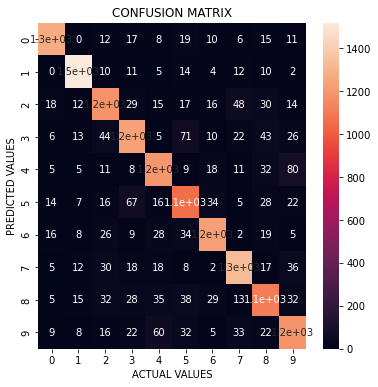

In [54]:
fig=plt.figure(figsize=(6,6))
b=sn.heatmap(ce,annot=True)
b.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [55]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(ce.shape[0]):
    tp=ce.iloc[i,i]
    fp=ce.iloc[i,:].sum()-tp
    fn=ce.iloc[:,i].sum()-tp
    tn=ce.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(ce.index[i]),precision ,recall, f1_score)

for class 0 is: 0.9280997798972854 0.9419210722263589 0.9349593495934959
for class 1 is: 0.9571518588531821 0.9499687304565353 0.9535467671060891
for class 2 is: 0.8555878084179971 0.8568313953488372 0.8562091503267975
for class 3 is: 0.8370672097759674 0.8550624133148405 0.8459691252144083
for class 4 is: 0.8692476260043828 0.8623188405797102 0.8657693706802474
for class 5 is: 0.834913112164297 0.8137028483448807 0.8241715399610137
for class 6 is: 0.8923076923076924 0.9049034175334324 0.8985614164514939
for class 7 is: 0.9010169491525424 0.8973666441593517 0.8991880920162382
for class 8 is: 0.8300898203592815 0.8369811320754716 0.833521232619316
for class 9 is: 0.850864553314121 0.8381831085876508 0.8444762245262781


Text(0, 0.5, 'True positive rate')

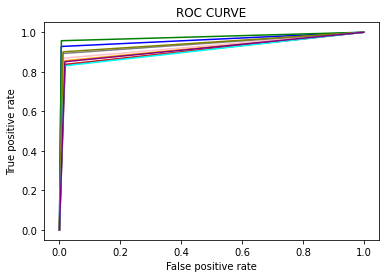

In [56]:
#plotting curve
from sklearn.metrics import roc_curve
ye=np.array(y_test,dtype='int')
p_prob= reg_e.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(ye,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=10

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(ye,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.plot(fpr[3],tpr[3],color='red')
plt.plot(fpr[4],tpr[4],color='pink')
plt.plot(fpr[5],tpr[5],color='brown')
plt.plot(fpr[6],tpr[6],color='gray')
plt.plot(fpr[7],tpr[7],color='olive')
plt.plot(fpr[8],tpr[8],color='cyan')
plt.plot(fpr[9],tpr[9],color='purple')

plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# LOG_LOSS CRITERIA

In [57]:
#log_loss
reg_l= DecisionTreeClassifier(criterion = 'log_loss')
reg_l= reg_l.fit(x_train,y_train)

In [58]:
ypl=reg_l.predict(x_test)
ypl

array(['7', '3', '4', ..., '5', '6', '1'], dtype=object)

In [59]:
correct = 0
incorrect = 0
for i in range(14000):
    if ypl[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/14000) * 100
incorrect = 14000 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  12299 : incorrect =  1701
Accuracy =  87.85


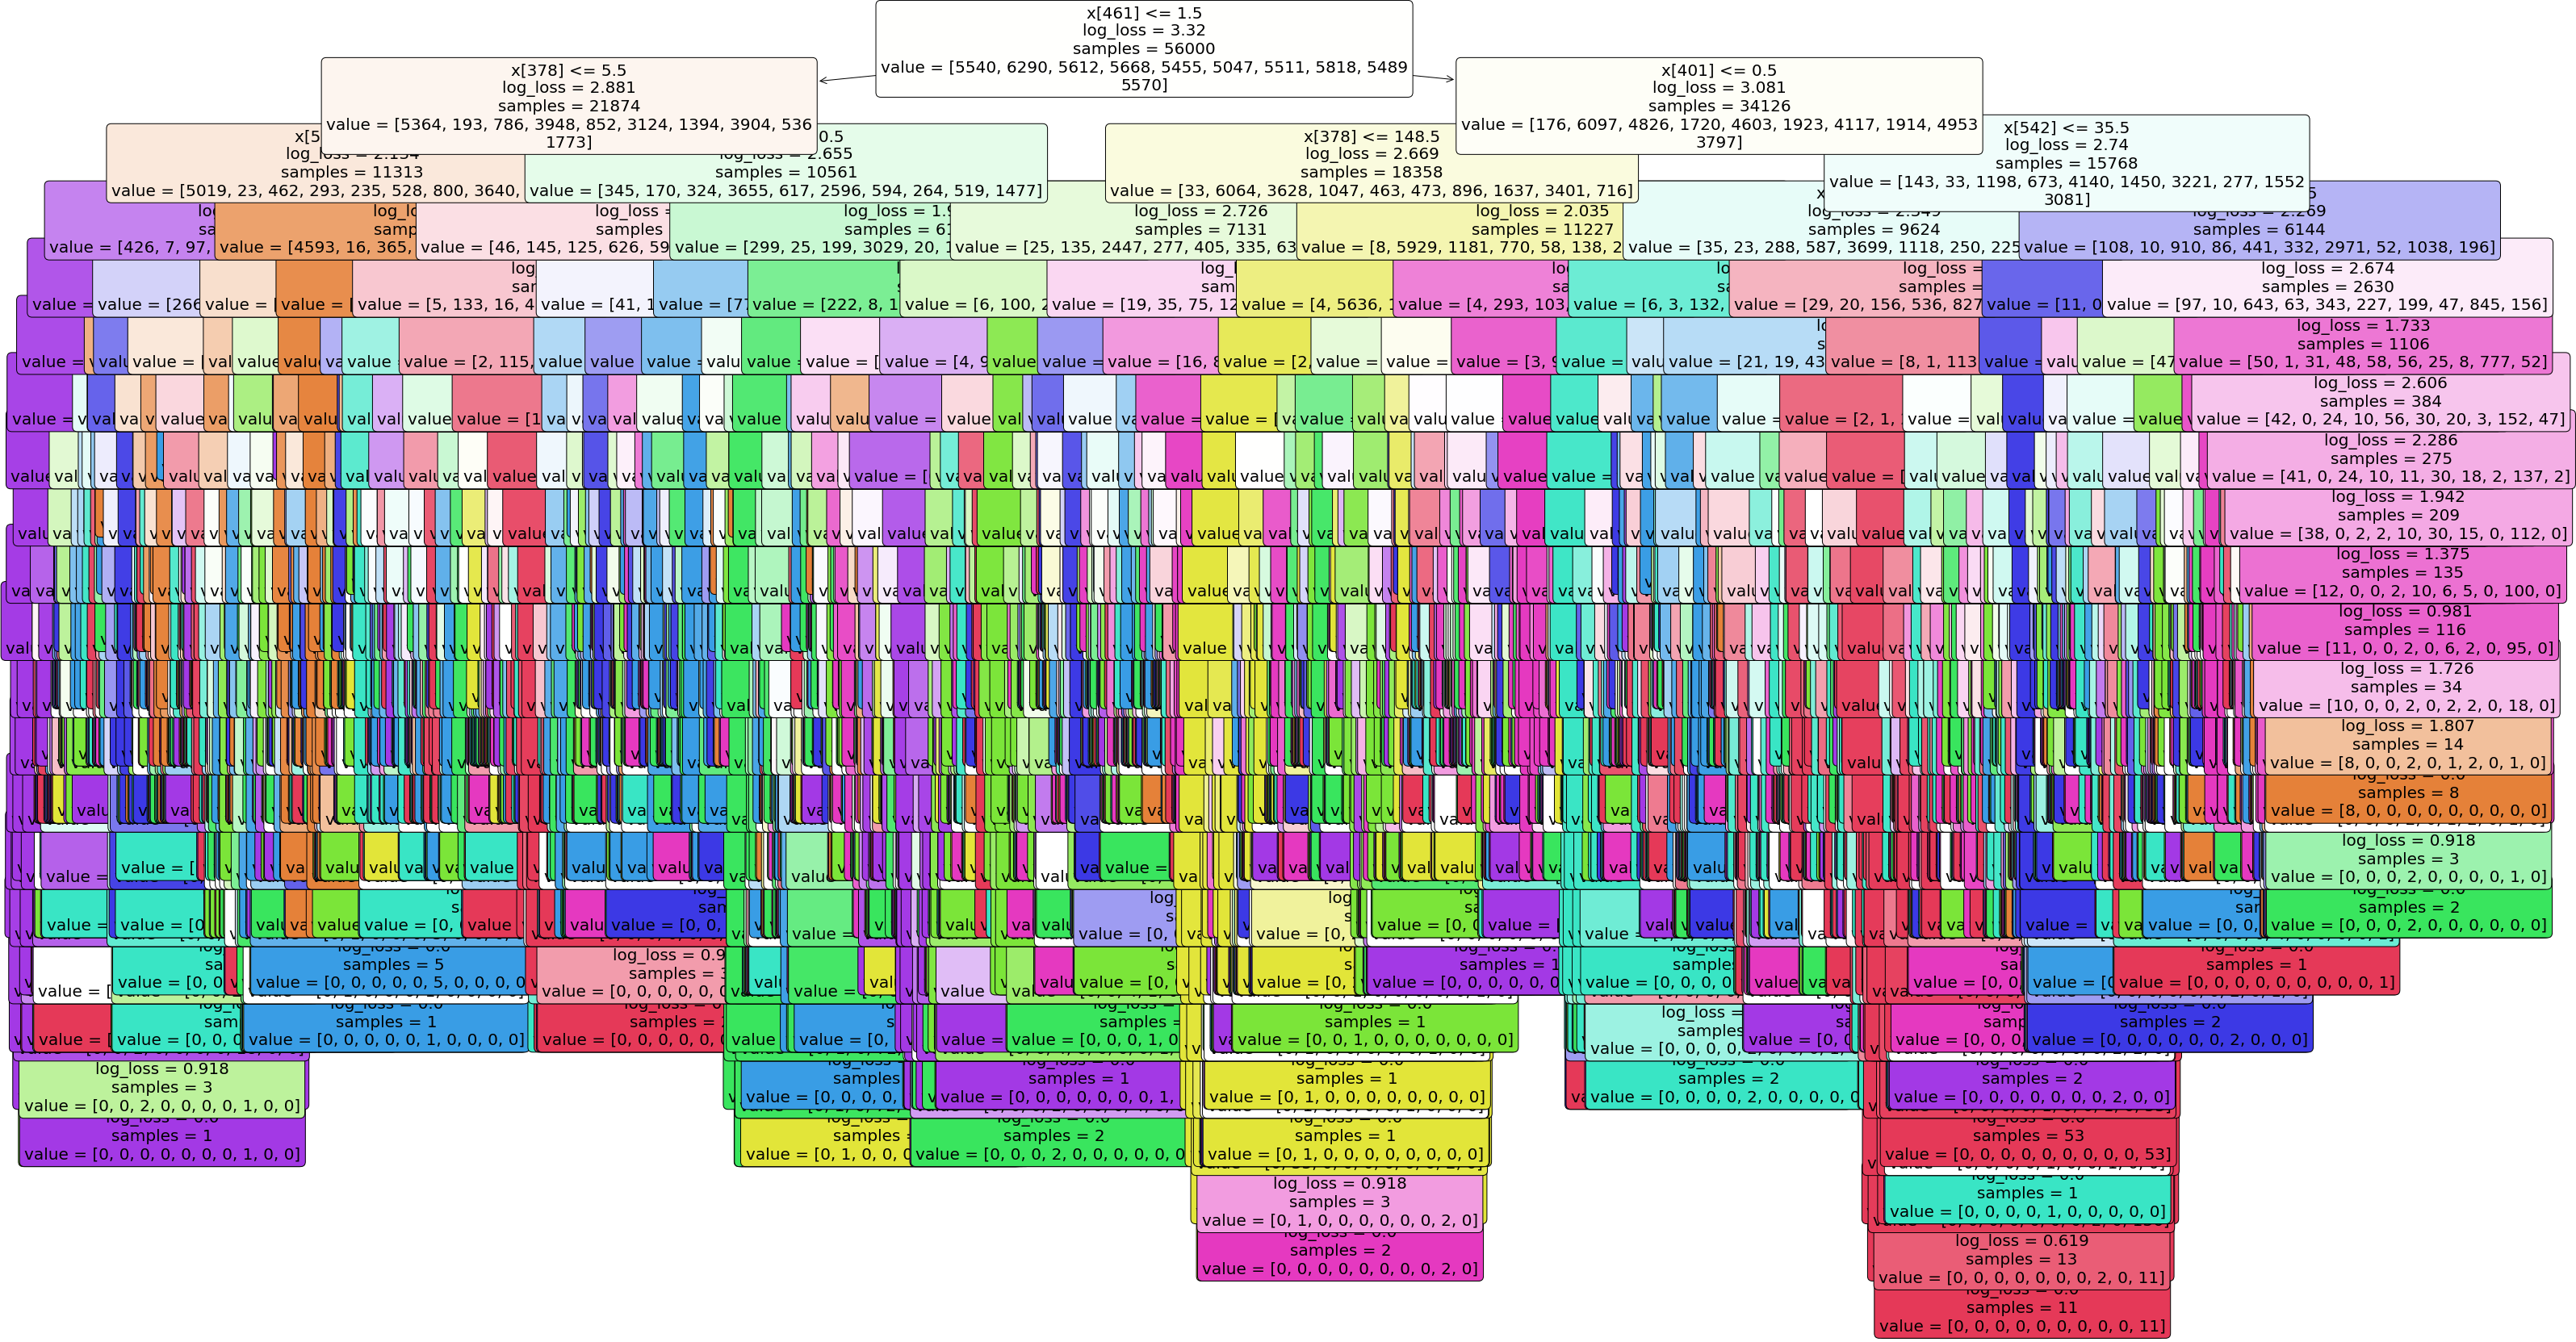

In [60]:
plt.figure(figsize=(50,30))
tree.plot_tree(reg_l, rounded =True,filled= True, fontsize=20)
plt.show()

In [61]:
val=pd.DataFrame({'y_test':y_test,'ypl':ypl})
#val

In [62]:
#plotting confusion matrix
cl = pd.crosstab(val['y_test'], val['ypl'])
print (cl)

ypl        0     1     2     3     4     5     6     7     8     9
y_test                                                            
0       1273     1     8     8     9    24    11     7    14     8
1          3  1516    10    12     4     9     5    11    14     3
2         14     8  1173    33    19    10    23    51    29    18
3          8    10    42  1234     5    71     9    19    47    28
4          7     5     7     7  1195    11    21    13    23    80
5         15    12    18    58    16  1056    37     5    28    21
6         16    11    20     5    23    32  1230     6    19     3
7          2    13    30    15    21     8     2  1336    17    31
8          7     9    32    31    38    45    25    16  1104    29
9          8     7    11    20    53    22     8    41    36  1182


[Text(0.5, 33.0, 'ACTUAL VALUES'),
 Text(33.0, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

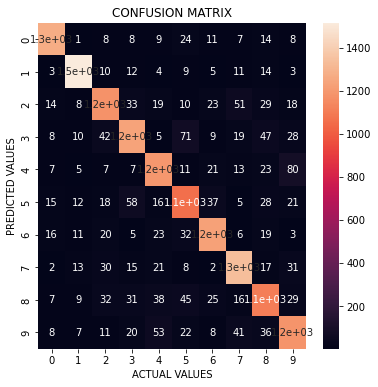

In [63]:
fig=plt.figure(figsize=(6,6))
b=sn.heatmap(cl,annot=True)
b.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [64]:
#finding precision,recall and F score from confusion matrix for each class
for i in range(cl.shape[0]):
    tp=cl.iloc[i,i]
    fp=cl.iloc[i,:].sum()-tp
    fn=cl.iloc[:,i].sum()-tp
    tn=cl.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(cl.index[i]),precision ,recall, f1_score)

for class 0 is: 0.933969185619956 0.9408721359940873 0.9374079528718704
for class 1 is: 0.9552614996849401 0.9522613065326633 0.9537590437244415
for class 2 is: 0.851233671988389 0.8682457438934122 0.85965555148406
for class 3 is: 0.8377460964019009 0.8671820098383697 0.8522099447513812
for class 4 is: 0.872899926953981 0.8640636297903109 0.8684593023255816
for class 5 is: 0.8341232227488151 0.8198757763975155 0.826938136256852
for class 6 is: 0.9010989010989011 0.8971553610503282 0.8991228070175439
for class 7 is: 0.9057627118644068 0.8877076411960133 0.8966442953020134
for class 8 is: 0.8263473053892215 0.8294515401953418 0.8278965129358831
for class 9 is: 0.8515850144092219 0.84248039914469 0.8470082407739162


Text(0, 0.5, 'True positive rate')

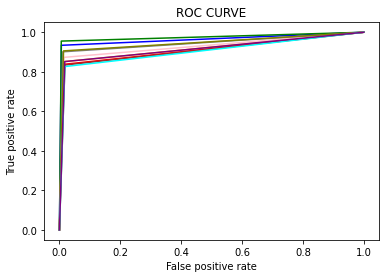

In [65]:
#plotting curve
from sklearn.metrics import roc_curve
yl=np.array(y_test,dtype='int')
p_prob= reg_l.predict_proba(x_test)
fpr1,tpr1,thresh1=roc_curve(yl,p_prob[:,1],pos_label=1)
fpr={}
tpr={}
thresh={}

n_class=10

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(yl,p_prob[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],color='blue')
plt.plot(fpr[1],tpr[1],color='green')
plt.plot(fpr[2],tpr[2],color='orange')
plt.plot(fpr[3],tpr[3],color='red')
plt.plot(fpr[4],tpr[4],color='pink')
plt.plot(fpr[5],tpr[5],color='brown')
plt.plot(fpr[6],tpr[6],color='gray')
plt.plot(fpr[7],tpr[7],color='olive')
plt.plot(fpr[8],tpr[8],color='cyan')
plt.plot(fpr[9],tpr[9],color='purple')

plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")